In [ ]:
#import stuff that needed
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#knobs
BATCH_SIZE = 32
EPOCHS = 40
IMG_SIZE = (150, 150)
IMG_SHAPE = (150, 150, 3)

In [ ]:
import zipfile, os

local_zip = '/content/drive/MyDrive/Dataset/minibuahsayur3.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/minibuahsayur'

NUM_OF_CLASS = len(os.listdir(base_dir))

In [ ]:
train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'training'
)

test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'validation'
)

Found 1001 images belonging to 10 classes.
Found 250 images belonging to 10 classes.


In [ ]:
TRAIN_SIZE = train_generator.n
TEST_SIZE = test_generator.n

In [ ]:
model = Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_OF_CLASS, activation='softmax')
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs = EPOCHS,
    steps_per_epoch = TRAIN_SIZE // BATCH_SIZE,
    validation_data = test_generator,
    validation_steps = TEST_SIZE // BATCH_SIZE
)

Epoch 1/40
31/31 [==============================] - 26s 278ms/step - loss: 2.5234 - accuracy: 0.1408 - val_loss: 1.6593 - val_accuracy: 0.3348
Epoch 2/40
31/31 [==============================] - 8s 261ms/step - loss: 1.7270 - accuracy: 0.3606 - val_loss: 1.4794 - val_accuracy: 0.4509
Epoch 3/40
31/31 [==============================] - 8s 262ms/step - loss: 1.3226 - accuracy: 0.5016 - val_loss: 1.3071 - val_accuracy: 0.5402
Epoch 4/40
31/31 [==============================] - 8s 267ms/step - loss: 1.1790 - accuracy: 0.5699 - val_loss: 1.1689 - val_accuracy: 0.5580
Epoch 5/40
31/31 [==============================] - 8s 268ms/step - loss: 1.0877 - accuracy: 0.6184 - val_loss: 1.0861 - val_accuracy: 0.5670
Epoch 6/40
31/31 [==============================] - 8s 263ms/step - loss: 1.0317 - accuracy: 0.6487 - val_loss: 1.1610 - val_accuracy: 0.5402
Epoch 7/40
31/31 [==============================] - 8s 265ms/step - loss: 1.0262 - accuracy: 0.6299 - val_loss: 0.8431 - val_accuracy: 0.6875
Epoch

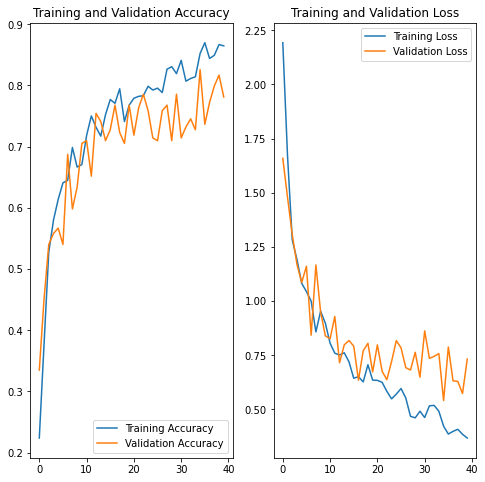

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving banan.jpg to banan (1).jpg
banan.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


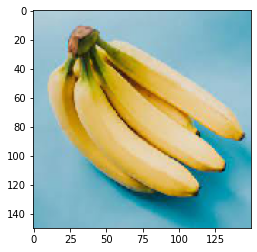

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMG_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

In [ ]:
!mkdir -p saved_model
export_dir = 'saved_model/mpasi_dummies'

tf.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: saved_model/mpasi_dummies/assets


INFO:tensorflow:Assets written to: saved_model/mpasi_dummies/assets


In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/mpasi_dummies/ (stored 0%)
  adding: content/saved_model/mpasi_dummies/assets/ (stored 0%)
  adding: content/saved_model/mpasi_dummies/saved_model.pb (deflated 89%)
  adding: content/saved_model/mpasi_dummies/variables/ (stored 0%)
  adding: content/saved_model/mpasi_dummies/variables/variables.data-00000-of-00001 (deflated 28%)
  adding: content/saved_model/mpasi_dummies/variables/variables.index (deflated 65%)


In [ ]:
from google.colab import files
files.download("/content/saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>